In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../.venv/lib/python3.7/site-packages/')
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt

from coordination.entity.trial import Trial
from coordination.component.speech.vocalics_component import VocalicsComponent, SegmentationMethod
from coordination.plot.vocalics import plot_utterance_durations

In [3]:
trial = Trial.from_directory("../data/study-3_2022/T000745")

In [4]:
vocalics_component = VocalicsComponent.from_vocalics(trial.vocalics)

Utterance starting at 2022-06-14T22:49:59.101494+00:00 and ending 
                at 2022-06-14T22:49:59.101494+00:00 is short and does not have any vocalics. Text:  okay
Utterance starting at 2022-06-14T22:50:23.601494+00:00 and ending 
                at 2022-06-14T22:50:23.601494+00:00 is short and does not have any vocalics. Text:  yeah
Utterance starting at 2022-06-14T22:50:58.101494+00:00 and ending 
                at 2022-06-14T22:50:58.101494+00:00 is short and does not have any vocalics. Text:  okay
Utterance starting at 2022-06-14T22:51:42.701494+00:00 and ending 
                at 2022-06-14T22:51:42.701494+00:00 is short and does not have any vocalics. Text:  okay
Utterance starting at 2022-06-14T22:52:57.857134+00:00 and ending 
                at 2022-06-14T22:52:57.857134+00:00 is short and does not have any vocalics. Text:  engineer
Utterance starting at 2022-06-14T22:53:42.357134+00:00 and ending 
                at 2022-06-14T22:53:42.357134+00:00 is short and does

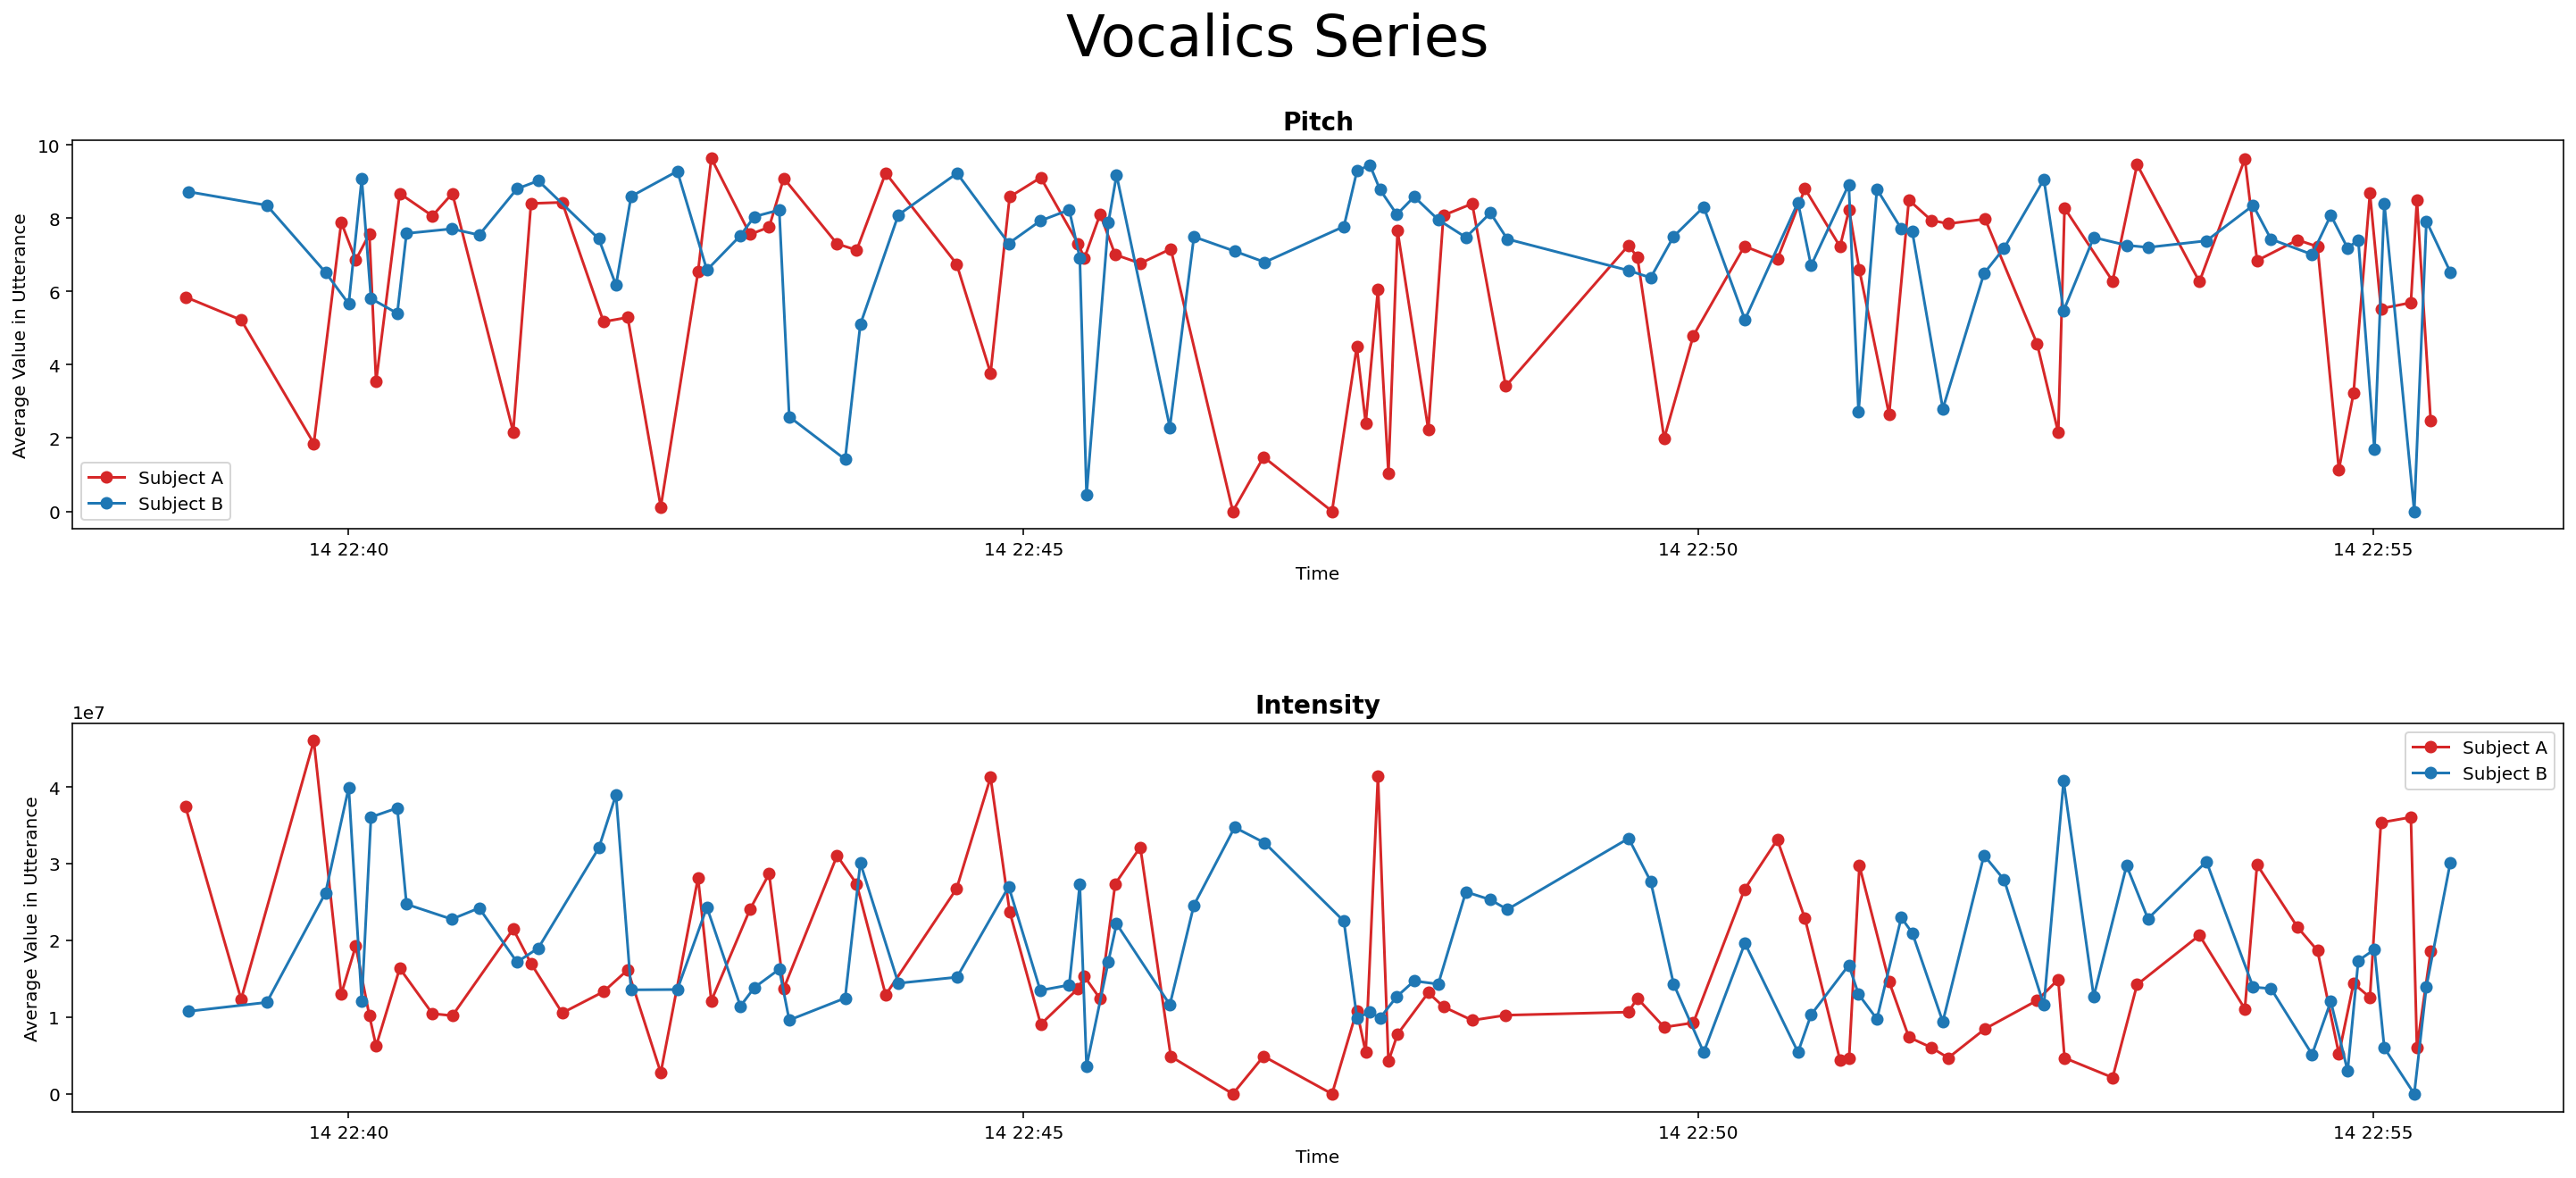

In [11]:
fig, axes = plt.subplots(len(vocalics_component.features), figsize=(25, 10))
fig.suptitle("Vocalics Series", fontsize=32)

vocalics_component.plot_features(axes, num_time_steps=1020, timestamp_as_index=True)
plt.subplots_adjust(hspace=0.5)

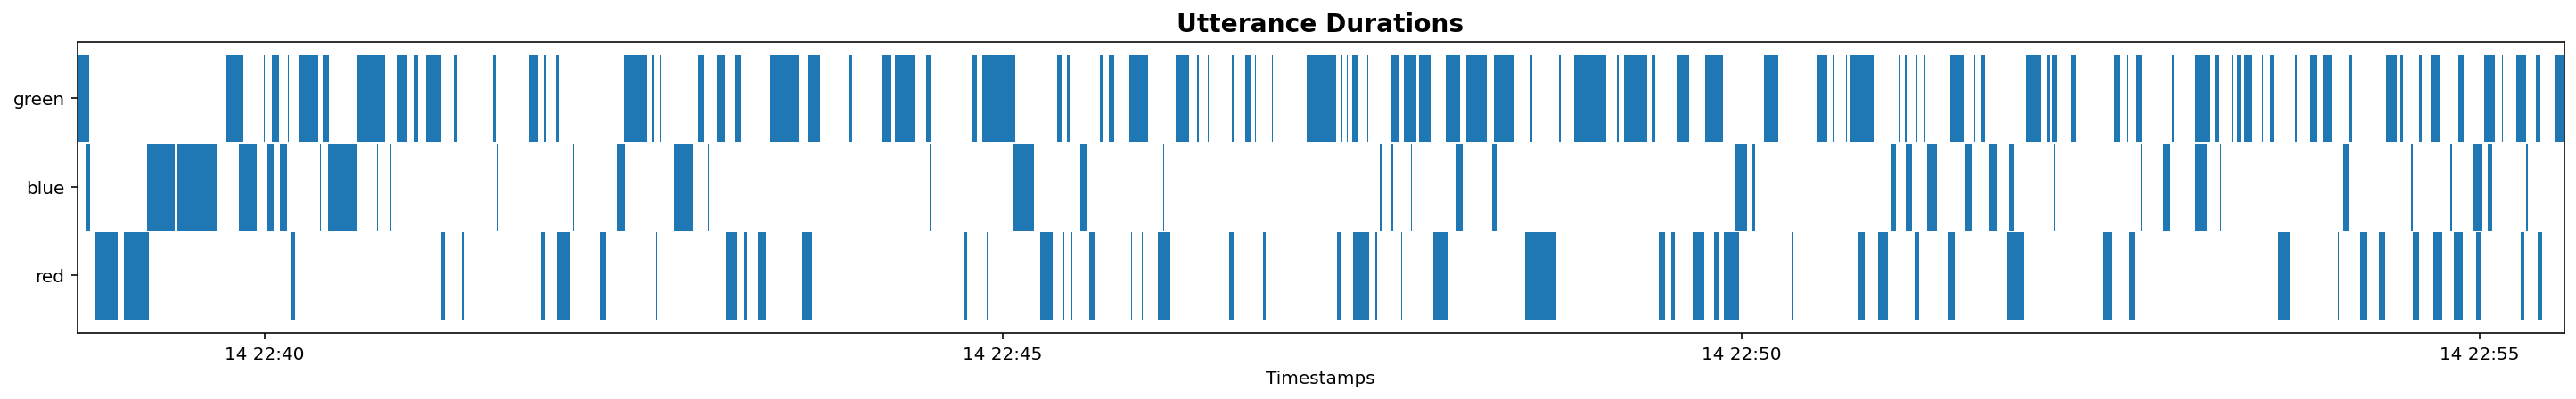

In [22]:
plt.figure(figsize=(25, 3))
plot_utterance_durations(plt.gca(), trial.vocalics.utterances_per_subject)

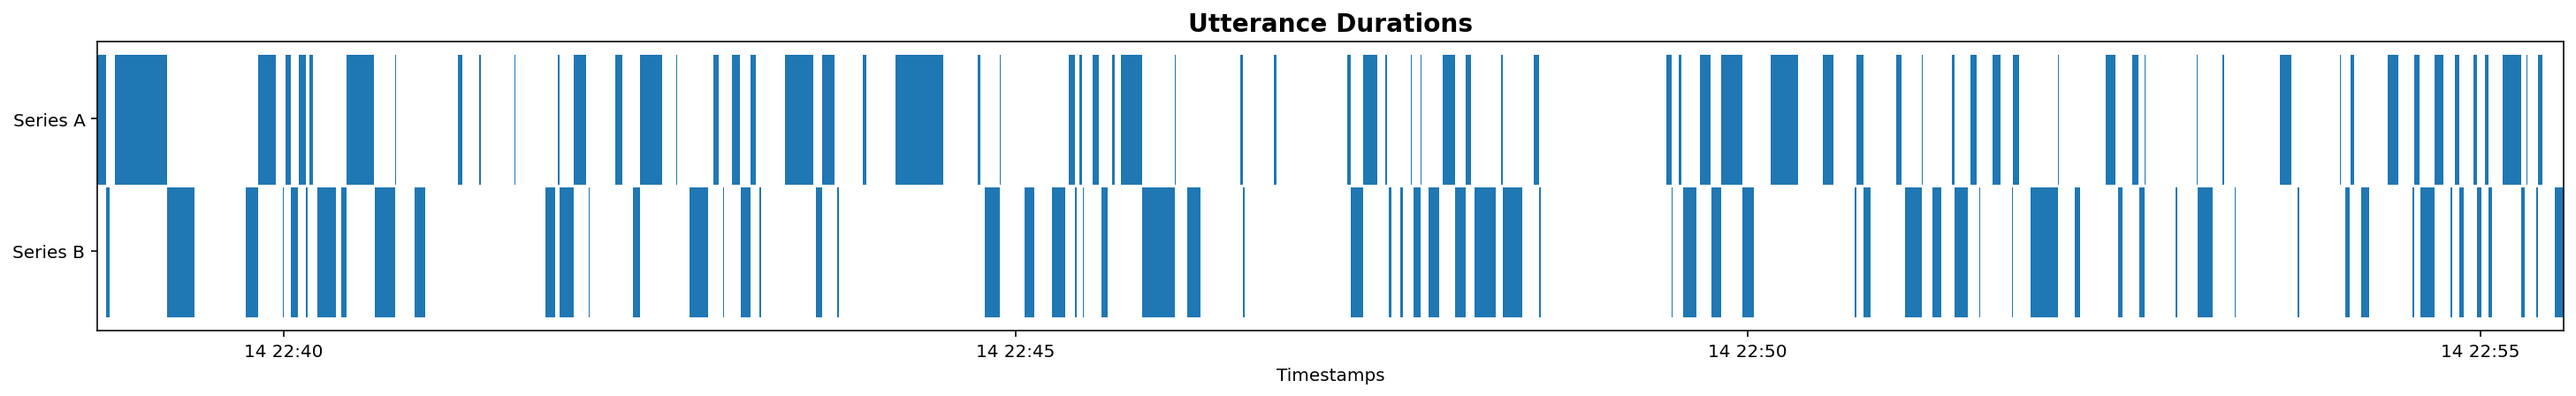

In [24]:
plt.figure(figsize=(25, 3))
vocalics_component.plot_utterance_durations(plt.gca())